#### Половников Никита

# Распределение Стьдента (t-расределение)

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import statistics 
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Для выбранного распределения сгенерируйте выборки разного объема и проиллюстрируйте сходимость выборочного среднего к математическому ожиданию (покажите наглядно стабилизацию выборочного среднего).

***Мат. ожидание распределения Сьюдента по определению равна 0, следовательно необходимо добиваться сходимости выборочного средннего к 0.***

$$\mathbb{E}_{Student} \stackrel{def}{=} 0$$

***Очевидно, что в зависимости от количества степеней свободы, скорость сходимости будет меняться. Для лучшей визуализации результата зафиксируем:*** $$d.o.f = 10$$

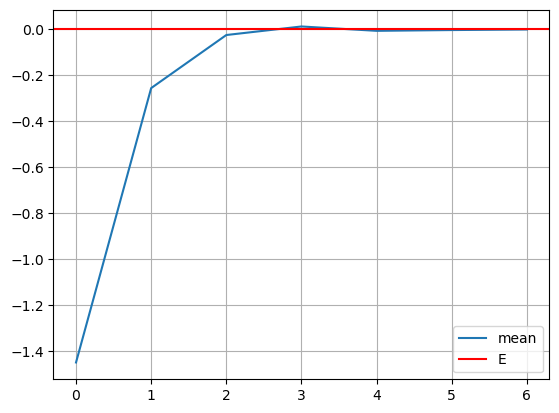

In [2]:
t = sps.t(10)

mean_arr = []

for i in [1,10,100,1000, 10000, 100000, 1000000]:
    temp = t.rvs(size=i).mean()
    mean_arr.append(temp)

plt.plot(mean_arr, label='mean')
plt.axhline(0, color='red', label='E')
plt.grid()

plt.legend()

***Как можно заметить, с увеличением размера выборки, выборочное среднее начинает все больше походить на мат. ожидание.***

### 2. Наглядно продемонстрируйте центральную предельную теорему в действии для выбранного вами распределения (покажите сходимость с ростом выборки к нормальному распределению).

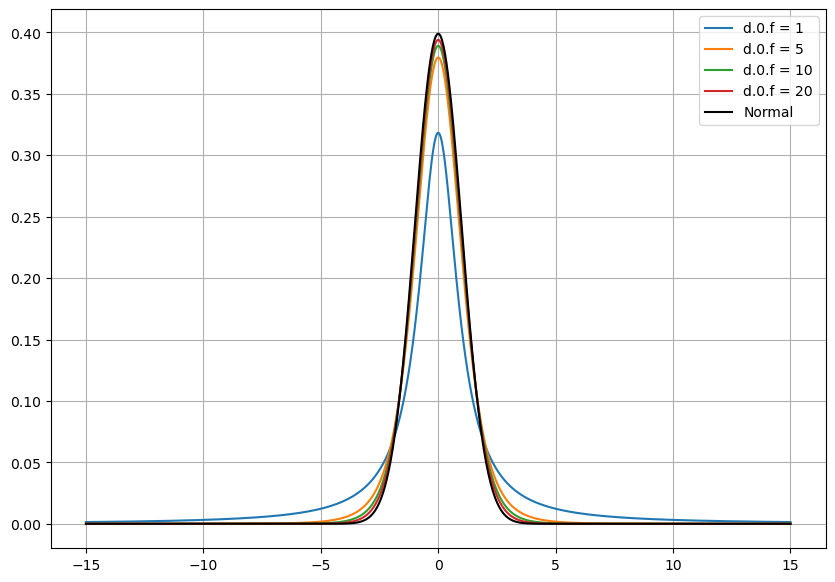

In [3]:
plt.figure(figsize=(10, 7))

x = np.linspace(-15,15,1000)

norm = sps.norm(0,1)
norm_pdf = norm.pdf(x)

for i in [1,5,10,20]:
    t = sps.t(i)
    pdf = t.pdf(x)
    plt.plot(x, pdf, label=f'd.0.f = {i}')

plt.plot(x, norm_pdf, color='black', label='Normal')

plt.legend()
plt.grid()

***На распределении Стьюдента очень хорошо видна сходимость к нормальному распределению.***

### 3. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте асимптотический доверительный интервал для среднего значения на базе ЦПТ


***Асимптотический доверительный интервал имеет вид:***
    $$ \left[ \overline x \pm z_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\widehat s^2}{n}} \right]$$

$\mathbb{E}_{Student} \stackrel{def}{=} 0$

In [4]:
alpha = 0.05 

left_list_3 = []
right_list_3 = []

for i in [10,1000, 100000]:
    t = sps.t(i-1)
    
    sample = t.rvs(size=i)
    samp_mean = sample.mean()
    samp_std = sample.std()

    left, right = sps.t.interval(1-alpha, df=i-1, loc=samp_mean, scale = samp_std/np.sqrt(i))#нормируем отклонение на величину выборки
    
    left_list_3.append(left)
    right_list_3.append(right)
    
data_3 = {'Левая граница':left_list_3, 'Правая граница':right_list_3, 'Размер выборки':[10,1000, 100000]}
df_3 = pd.DataFrame(data_3)
df_3


,Левая граница,Правая граница,Размер выборки
0,-0.850775,0.334064,10
1,-0.071493,0.053604,1000
2,-0.001111,0.011223,100000


### 4. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте точный доверительный интервал для среднего значения

***Точный доверительный интервал имеет вид:***
    $$ \left[ \overline x \pm t_{1-\frac{\alpha}{2}} \cdot \sqrt{\frac{\widehat s ^2}{n}} \right]$$

***Зафиксируем уровень значимости*** $\normalsize \alpha$ ***на уровне*** $0.05.$

In [5]:
alpha = 0.05 

left_list_4 = []
right_list_4 = []

for i in [10, 1000, 100000]:
    t = sps.t(i-1)
    
    sample = t.rvs(size=i)
    samp_mean = sample.mean()
    samp_std = sample.std()

    t_rv = sps.t(i-1)
    t_crit = t_rv.ppf(1-alpha/2)

    left = samp_mean - t_crit*samp_std/np.sqrt(i)
    right = samp_mean + t_crit*samp_std/np.sqrt(i)
    
    left_list_4.append(left)
    right_list_4.append(right)
    
data_4 = {'Левая граница':left_list_4, 'Правая граница':right_list_4, 'Размер выборки':[10,1000, 100000]}
df_4 = pd.DataFrame(data_4)
df_4

,Левая граница,Правая граница,Размер выборки
0,-0.129193,0.795241,10
1,-0.053455,0.074202,1000
2,-0.005806,0.006573,100000


### 5. Сгенерируйте выборки маленького/среднего/большого размера и для каждой из них постройте эфронов доверительный интервал для среднего, медианы, моды, дисперсии.

***Зафиксируем уровень значимости*** $\normalsize \alpha$ ***на уровне*** $0.05.$

$\mathbb{E}_{Student} \stackrel{def}{=} 0$

${Me}_{Student} \stackrel{def}{=} 0$

$ Mode_{Student} \stackrel{def}{=} 0$

$\mathbb{D}_{Student} \stackrel{def}{=} \frac{n}{n-2}, n > 2$


In [6]:
means_list = []
medians_list = []
modes_list = []
vars_list = []

left_list_mean = []
right_list_mean = []

left_list_median = []
right_list_median = []

left_list_mode = []
right_list_mode = []

left_list_var = []
right_list_var = []

for i in [10,100, 10000]:
    t = np.random.standard_t(i-1, size = i)
    
    for _ in range(1000):
        temp = np.random.choice(t, size = i, replace=True)
        means_list.append(np.mean(temp))
        medians_list.append(np.median(temp))
        modes_list.append(statistics.mode(temp))
        vars_list.append(np.var(temp))
    
    left_list_mean.append(np.percentile(means_list, q=[2.5, 97.5]).round(3)[0])
    right_list_mean.append(np.percentile(means_list, q=[2.5, 97.5]).round(3)[1])
    
    left_list_median.append(np.percentile(medians_list, q=[2.5, 97.5]).round(3)[0])
    right_list_median.append(np.percentile(medians_list, q=[2.5, 97.5]).round(3)[1])
    
    left_list_mode.append(np.percentile(modes_list, q=[2.5, 97.5]).round(3)[0])
    right_list_mode.append(np.percentile(modes_list, q=[2.5, 97.5]).round(3)[1])
    
    left_list_var.append(np.percentile(vars_list, q=[2.5, 97.5]).round(3)[0])
    right_list_var.append(np.percentile(vars_list, q=[2.5, 97.5]).round(3)[1])
    
    means_list = []
    medians_list = []
    modes_list = []
    vars_list = []


In [7]:
print('\033[1m' + 'Эфронов доверительный интервал для среднего:')  
data = {'Левая граница':left_list_mean, 'Правая граница':right_list_mean, 'Размер выборки':[10,1000, 100000]}
df = pd.DataFrame(data)
df


Эфронов доверительный интервал для среднего:


,Левая граница,Правая граница,Размер выборки
0,-0.265,1.124,10
1,-0.232,0.174,1000
2,-0.017,0.024,100000


In [8]:
print('\033[1m' + 'Эфронов доверительный интервал для медианы:')  
data_median = {'Левая граница':left_list_median, 'Правая граница':right_list_median, 'Размер выборки':[10,1000, 100000]}
df_median = pd.DataFrame(data_median)
df_median


Эфронов доверительный интервал для медианы:


,Левая граница,Правая граница,Размер выборки
0,-0.784,1.690,10
1,-0.284,0.168,1000
2,-0.034,0.020,100000


In [9]:
print('\033[1m' + 'Эфронов доверительный интервал для моды:')  
data_mode = {'Левая граница':left_list_mode, 'Правая граница':right_list_mode, 'Размер выборки':[10,1000, 100000]}
df_mode = pd.DataFrame(data_mode)
df_mode


Эфронов доверительный интервал для моды:


,Левая граница,Правая граница,Размер выборки
0,-1.235,2.049,10
1,-1.951,1.893,1000
2,-1.903,1.826,100000


*Для медианы распределения Стьюдента плохо видно сужение довериального интервала (иногда его вообще нет).*

In [10]:
print('\033[1m' + 'Эфронов доверительный интервал для дисперсии:')  
data_var = {'Левая граница':left_list_var, 'Правая граница':right_list_var, 'Размер выборки':[10,1000, 100000]}
df_var = pd.DataFrame(data_var)
df_var


Эфронов доверительный интервал для дисперсии:


,Левая граница,Правая граница,Размер выборки
0,0.611,1.848,10
1,0.822,1.436,1000
2,0.961,1.014,100000


### В пунктах 3-5 наглядно видно то, что при увеличении размера выборки, ширина ДИ уменьшается и стремится к теоретической величине.